In [52]:
import numpy as np
import seaborn as sns
import pandas as pd
import os 
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing import image
from keras.applications import DenseNet121
from tensorflow.keras.utils import load_img
from keras.applications.densenet import preprocess_input, decode_predictions
from keras.layers import GlobalMaxPooling2D
from keras.utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import pathlib
from sklearn.metrics.pairwise import linear_kernel
import pickle

In [3]:
path = r'C:\Users\HP_LAPY\Downloads\cloth recommendation'
dataset_path = pathlib.Path(path)
images=os.listdir(dataset_path)
images

['.ipynb_checkpoints',
 'df_embedding.csv',
 'images',
 'images.csv',
 'styles.csv',
 'Untitled.ipynb']

(-0.5, 59.5, 79.5, -0.5)

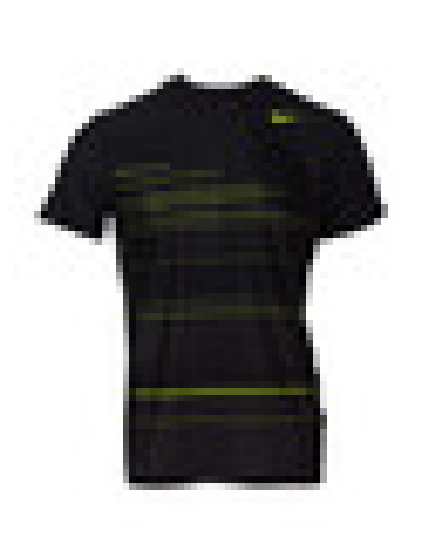

In [7]:
plt.figure(figsize=(10,10))
cloth_img =  mpimg.imread(r'C:\Users\HP_LAPY\Downloads\cloth recommendation\images\10010.jpg')
plt.imshow(cloth_img)
plt.axis("off")

In [24]:
df = pd.read_csv(r'C:\Users\HP_LAPY\Downloads\cloth recommendation\styles.csv', nrows=6000, error_bad_lines=False)
df['image'] = df.apply(lambda x: str(x['id']) + ".jpg", axis=1)
df = df.reset_index(drop=True)
print(df.shape)
df.head(5)

(6000, 11)


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012,Casual,Puma Men Grey T-shirt,53759.jpg


In [43]:
df.shape

(6000, 11)

In [25]:
#image dim
img_width, img_height, chnl = 200, 200, 3

# DenseNet121
densenet = DenseNet121(include_top=False, weights='imagenet', input_shape=(img_width, img_height, chnl))
densenet.trainable = False

# Add Layer Embedding
model = keras.Sequential([
    densenet,
    GlobalMaxPooling2D()
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 6, 6, 1024)        7037504   
                                                                 
 global_max_pooling2d_1 (Glo  (None, 1024)             0         
 balMaxPooling2D)                                                
                                                                 
Total params: 7,037,504
Trainable params: 0
Non-trainable params: 7,037,504
_________________________________________________________________


In [26]:
def img_path(img):
    return path + '/images/' + img
def model_predict(model, img_name):
    # Reshape
    img = image.load_img(img_path(img_name), target_size=(img_width, img_height))
    # img to Array
    x   = image.img_to_array(img)
    # Expand Dim (1, w, h)
    x   = np.expand_dims(x, axis=0)
    # Pre process Input
    x   = preprocess_input(x)
    return model.predict(x).reshape(-1)

In [27]:
df_copy      = df
df_embedding = df_copy['image'].apply(lambda x: model_predict(model, x))
df_embedding        = df_embedding.apply(pd.Series)
df_embedding.head(5)

1/1 [==============================] - 0s 187ms/step


1/1 [==============================] - 0s 172ms/step


1/1 [==============================] - 0s 191ms/step


1/1 [==============================] - 0s 178ms/step


1/1 [==============================] - 0s 240ms/step


1/1 [==============================] - 0s 295ms/step


1/1 [==============================] - 0s 204ms/step


1/1 [==============================] - 0s 238ms/step


1/1 [==============================] - 0s 271ms/step


1/1 [==============================] - 0s 262ms/step


1/1 [==============================] - 0s 258ms/step


1/1 [==============================] - 0s 280ms/step


1/1 [==============================] - 0s 304ms/step


1/1 [==============================] - 0s 306ms/step


1/1 [==============================] - 1s 528ms/step


1/1 [==============================] - 0s 488ms/step


1/1 [==============================] - 1s 608ms/step


1/1 [==============================] - 0s 353ms/step


1/1 [==============================] - 1s 615ms/step


1/1 [==============================] - 1s 670ms/step


,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.001453,0.007667,0.020786,0.017618,0.563271,1.813152,0.004163,0.009205,1.286593,0.001648,...,2.046631,0.712431,16.476814,0.743844,0.915035,0.888128,4.459037,2.630811,6.901199,4.310223
1,0.001270,0.033970,0.010328,0.018846,0.534164,1.102736,0.001283,0.009292,1.386438,0.000774,...,0.351496,6.866707,10.786263,6.283562,2.486137,4.042778,6.910816,0.906822,2.356663,1.481572
2,0.001749,0.009188,0.014581,0.007122,0.568847,1.369896,0.002457,0.003840,0.607829,0.000701,...,2.888704,7.010262,4.313012,1.585577,3.094142,0.225649,7.055236,4.394616,16.545860,1.425256
3,0.000788,0.019114,0.013595,0.017823,0.529423,2.502742,0.001060,0.010470,1.192753,0.001702,...,0.276013,0.000000,14.582142,4.909046,0.243702,4.130858,2.814882,0.500818,0.626903,1.440793
4,0.001572,0.012700,0.014415,0.014550,0.431777,1.308466,0.002086,0.011448,1.112463,0.001078,...,0.312273,1.817061,15.469979,3.959397,0.000000,0.694535,3.778374,6.004064,2.014088,2.263581


In [29]:
df_embedding.to_csv('df_embedding1.csv')

In [21]:
df_embedding = pd.read_csv(r'C:\Users\HP_LAPY\Downloads\cloth recommendation\df_embedding.csv')
df_embedding.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0.001453,0.007667,0.020786,0.017618,0.563271,1.813152,0.004163,0.009205,1.286593,...,2.046631,0.712431,16.476814,0.743844,0.915035,0.888128,4.459037,2.630811,6.901199,4.310223
1,1,0.001270,0.033970,0.010328,0.018846,0.534164,1.102737,0.001283,0.009292,1.386438,...,0.351496,6.866707,10.786263,6.283562,2.486137,4.042778,6.910816,0.906822,2.356663,1.481572
2,2,0.001749,0.009188,0.014581,0.007122,0.568847,1.369896,0.002457,0.003840,0.607829,...,2.888704,7.010262,4.313012,1.585577,3.094142,0.225649,7.055236,4.394616,16.545860,1.425256
3,3,0.000788,0.019114,0.013595,0.017823,0.529423,2.502742,0.001060,0.010470,1.192753,...,0.276013,0.000000,14.582142,4.909046,0.243702,4.130858,2.814882,0.500818,0.626903,1.440793
4,4,0.001572,0.012700,0.014415,0.014550,0.431777,1.308466,0.002086,0.011448,1.112463,...,0.312273,1.817061,15.469979,3.959397,0.000000,0.694535,3.778374,6.004064,2.014088,2.263581


In [30]:
cosine_sim = linear_kernel(df_embedding, df_embedding)

In [31]:
indices = pd.Series(range(len(df)), index=df.index)

In [32]:
def get_recommendations(index, df, cosine_sim=cosine_sim):
    idx = indices[index]

    # Get the pairwsie similarity scores of all clothes with that one
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the clothes based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 5 most similar clothes
    sim_scores = sim_scores[1:6]

    # Get the clothes indices
    cloth_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['image'].iloc[cloth_indices]

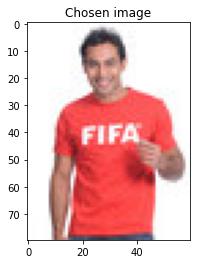

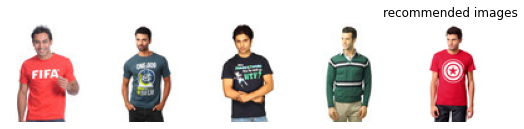

In [34]:
chosen_img_indx = 754

recommendation = get_recommendations(chosen_img_indx, df, cosine_sim)
recommendation_list = recommendation.to_list()
#chosen image
chosen_img =  mpimg.imread(path + '/images/' + df.iloc[chosen_img_indx].image)
plt.title("Chosen image")
plt.imshow(chosen_img)
#recommended images
plt.figure(figsize=(20,20))
j=0
for i in recommendation_list:
    plt.subplot(6, 10, j+1)
    cloth_img =  mpimg.imread(path + '/images/'+ i)
    plt.imshow(cloth_img)
    plt.axis("off")
    j+=1
plt.title("recommended images")
plt.subplots_adjust(wspace=-0.5, hspace=1)
plt.show()


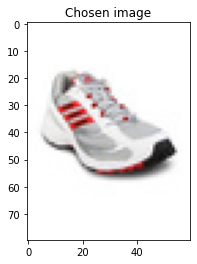

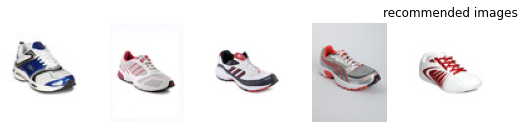

In [35]:
chosen_img_indx = 2500

recommendation = get_recommendations(chosen_img_indx, df, cosine_sim)
recommendation_list = recommendation.to_list()
#chosen image
chosen_img =  mpimg.imread(path + '/images/' + df.iloc[chosen_img_indx].image)
plt.title("Chosen image")
plt.imshow(chosen_img)
#recommended images
plt.figure(figsize=(20,20))
j=0
for i in recommendation_list:
    plt.subplot(6, 10, j+1)
    cloth_img =  mpimg.imread(path + '/images/'+ i)
    plt.imshow(cloth_img)
    plt.axis("off")
    j+=1
plt.title("recommended images")
plt.subplots_adjust(wspace=-0.5, hspace=1)
plt.show()

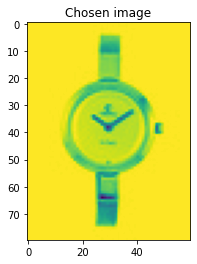

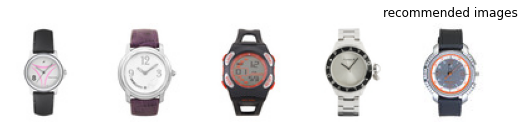

In [36]:
chosen_img_indx = 2

recommendation = get_recommendations(chosen_img_indx, df, cosine_sim)
recommendation_list = recommendation.to_list()
#chosen image
chosen_img =  mpimg.imread(path + '/images/' + df.iloc[chosen_img_indx].image)
plt.title("Chosen image")
plt.imshow(chosen_img)
#recommended images
plt.figure(figsize=(20,20))
j=0
for i in recommendation_list:
    plt.subplot(6, 10, j+1)
    cloth_img =  mpimg.imread(path + '/images/'+ i)
    plt.imshow(cloth_img)
    plt.axis("off")
    j+=1
plt.title("recommended images")
plt.subplots_adjust(wspace=-0.5, hspace=1)
plt.show()

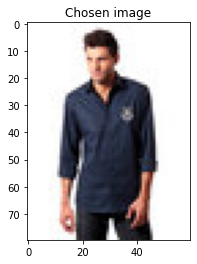

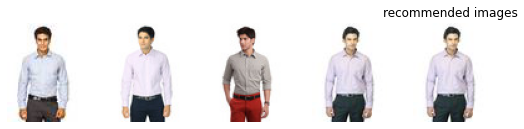

In [37]:
chosen_img_indx = 30

recommendation = get_recommendations(chosen_img_indx, df, cosine_sim)
recommendation_list = recommendation.to_list()
#chosen image
chosen_img =  mpimg.imread(path + '/images/' + df.iloc[chosen_img_indx].image)
plt.title("Chosen image")
plt.imshow(chosen_img)
#recommended images
plt.figure(figsize=(20,20))
j=0
for i in recommendation_list:
    plt.subplot(6, 10, j+1)
    cloth_img =  mpimg.imread(path + '/images/'+ i)
    plt.imshow(cloth_img)
    plt.axis("off")
    j+=1
plt.title("recommended images")
plt.subplots_adjust(wspace=-0.5, hspace=1)
plt.show()

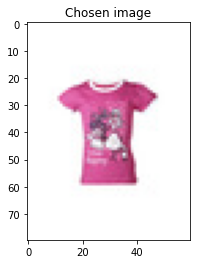

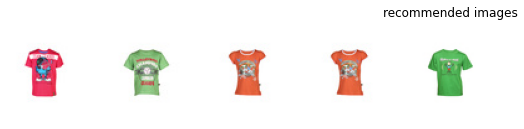

In [38]:
chosen_img_indx = 200

recommendation = get_recommendations(chosen_img_indx, df, cosine_sim)
recommendation_list = recommendation.to_list()
#chosen image
chosen_img =  mpimg.imread(path + '/images/' + df.iloc[chosen_img_indx].image)
plt.title("Chosen image")
plt.imshow(chosen_img)
#recommended images
plt.figure(figsize=(20,20))
j=0
for i in recommendation_list:
    plt.subplot(6, 10, j+1)
    cloth_img =  mpimg.imread(path + '/images/'+ i)
    plt.imshow(cloth_img)
    plt.axis("off")
    j+=1
plt.title("recommended images")
plt.subplots_adjust(wspace=-0.5, hspace=1)
plt.show()